In [4]:
import tkinter as tk
from PIL import Image, ImageTk

# Create the main window
window = tk.Tk()
window.title("Image Display")

# Load the image
image_path = "C:\\Users\\halas\\My EEG Proj\\Images\\background_image.jpg"
image = Image.open(image_path)

# Convert the image to Tkinter-compatible format
tk_image = ImageTk.PhotoImage(image)

# Create a label to display the image
image_label = tk.Label(window, image=tk_image)
image_label.pack()

# Run the Tkinter event loop
window.mainloop()


In [5]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import pandas as pd
import numpy as np
from scipy.stats import entropy, kurtosis
import pywt

# Function to compute Discrete Wavelet Transform (DWT) coefficients for a signal (column)
def calculate_dwt(signal):
    coeffs = pywt.wavedec(signal, 'db1')  # Using Daubechies wavelet of order 1
    return np.concatenate(coeffs)

# Function to load dataset and compute features
def process_dataset():
    # Load the dataset
    filepath = filedialog.askopenfilename(filetypes=[("CSV files", "features_raw.csv")])
    if not filepath:
        return
    dataset = pd.read_csv(filepath)

    # Dictionary to store computed features for each column
    features_dict = {}

    # Iterate over each column (signal) in the dataset
    for column in dataset.columns:
        signal_data = dataset[column]
        
        # Calculate Discrete Wavelet Transform (DWT) coefficients for the signal
        dwt_coefficients = calculate_dwt(signal_data)
        
        # Calculate other features
        std_dev = np.std(signal_data)
        variance = np.var(signal_data)
        ent = entropy(signal_data.value_counts(normalize=True), base=2)
        kurt = kurtosis(signal_data)
        
        # Store features in the dictionary
        features_dict[column] = {
            'DWT_coefficients': dwt_coefficients,
            'Standard_Deviation': std_dev,
            'Variance': variance,
            'Entropy': ent,
            'Kurtosis': kurt
        }

    # Display or further process the computed features
    for signal, features in features_dict.items():
        print(f"Features for '{signal}':")
        print("DWT Coefficients:", features['DWT_coefficients'])
        print("Standard Deviation:", features['Standard_Deviation'])
        print("Variance:", features['Variance'])
        print("Entropy:", features['Entropy'])
        print("Kurtosis:", features['Kurtosis'])
        print("\n")

# Create the main window
window = tk.Tk()
window.title("Dataset Analysis")

# Button to upload dataset and process features
upload_button = tk.Button(window, text="Upload Dataset", command=process_dataset)
upload_button.pack(pady=10)

# Function to display an image
def display_image():
    # Load the image
    image_path = "C:\\Users\\halas\\My EEG Proj\\Images\\background_image.jpg" # Replace with the path to your image
    image = Image.open(image_path)

    # Resize the image to fit the window if needed
    width, height = image.size
    if width > 800 or height > 600:
        image = image.resize((800, 600), Image.ANTIALIAS)

    # Convert the image to Tkinter-compatible format
    tk_image = ImageTk.PhotoImage(image)

    # Create a label to display the image
    image_label = tk.Label(window, image=tk_image)
    image_label.image = tk_image  # Keep a reference to avoid garbage collection
    image_label.pack()

# Button to display an image
display_button = tk.Button(window, text="EEG proj", command=display_image)
display_button.pack(pady=10)

# Run the Tkinter event loop
window.mainloop()


Features for 'Fp1':
DWT Coefficients: [-1.75548572 -2.08173954  0.06057197 ... -3.78937728  4.74935924
 -3.34956576]
Standard Deviation: 4.3036026750453455
Variance: 18.520995984657453
Entropy: 12.977279923499914
Kurtosis: 0.6710045412039038


Features for 'AF3':
DWT Coefficients: [ 3.26366298  3.65902216 -1.35957313 ... -9.76804858  4.7003234
  0.22389125]
Standard Deviation: 19.049398941096182
Variance: 362.87960001703635
Entropy: 12.977279923499914
Kurtosis: 13.205100103070617


Features for 'F3':
DWT Coefficients: [-0.12284205  0.1298734  -0.17096879 ...  1.17038055 -1.44596796
  3.83681764]
Standard Deviation: 4.949495971683463
Variance: 24.497510373710828
Entropy: 12.977279923499914
Kurtosis: 2.675107754783128


Features for 'F7':
DWT Coefficients: [ 0.52345154  1.75164393 -1.69875313 ... -4.62324235 -2.83202502
  9.95162276]
Standard Deviation: 19.528844723041473
Variance: 381.37577621666475
Entropy: 12.977279923499914
Kurtosis: 5.073803235565345


Features for 'FC5':
DWT Coeffi

In [6]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import pandas as pd
import numpy as np
from scipy.stats import entropy, kurtosis
import pywt

# Function to compute Discrete Wavelet Transform (DWT) coefficients for a signal (column)
def calculate_dwt(signal):
    coeffs = pywt.wavedec(signal, 'db1')  # Using Daubechies wavelet of order 1
    return np.concatenate(coeffs)

# Function to load dataset and compute features
def process_dataset():
    # Load the dataset
    filepath = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if not filepath:
        return
    dataset = pd.read_csv(filepath)

    # Dictionary to store computed features for each column
    features_dict = {}

    # Iterate over each column (signal) in the dataset
    for column in dataset.columns:
        signal_data = dataset[column]
        
        # Calculate Discrete Wavelet Transform (DWT) coefficients for the signal
        dwt_coefficients = calculate_dwt(signal_data)
        
        # Calculate other features
        std_dev = np.std(signal_data)
        variance = np.var(signal_data)
        ent = entropy(signal_data.value_counts(normalize=True), base=2)
        kurt = kurtosis(signal_data)
        
        # Store features in the dictionary
        features_dict[column] = {
            'DWT_coefficients': dwt_coefficients,
            'Standard_Deviation': std_dev,
            'Variance': variance,
            'Entropy': ent,
            'Kurtosis': kurt
        }

    # Display or further process the computed features
    for signal, features in features_dict.items():
        print(f"Features for '{signal}':")
        print("DWT Coefficients:", features['DWT_coefficients'])
        print("Standard Deviation:", features['Standard_Deviation'])
        print("Variance:", features['Variance'])
        print("Entropy:", features['Entropy'])
        print("Kurtosis:", features['Kurtosis'])
        print("\n")

    # Display the background image
    display_image()

# Create the main window
window = tk.Tk()
window.title("Dataset Analysis")

# Function to display an image
def display_image():
    # Load the image
    image_path = "C:\\Users\\halas\\My EEG Proj\\Images\\background_image.jpg" # Replace with the path to your image
    image = Image.open(image_path)

    # Resize the image to fit the window if needed
    width, height = image.size
    if width > 800 or height > 600:
        image = image.resize((800, 600), Image.ANTIALIAS)

    # Convert the image to Tkinter-compatible format
    tk_image = ImageTk.PhotoImage(image)

    # Create a label to display the image
    image_label = tk.Label(window, image=tk_image)
    image_label.image = tk_image  # Keep a reference to avoid garbage collection
    image_label.pack()

# Button to upload dataset and process features
upload_button = tk.Button(window, text="Upload Dataset", command=process_dataset)
upload_button.pack(pady=10)

# Run the Tkinter event loop
window.mainloop()


Features for 'Fp1':
DWT Coefficients: [-1.75548572 -2.08173954  0.06057197 ... -3.78937728  4.74935924
 -3.34956576]
Standard Deviation: 4.3036026750453455
Variance: 18.520995984657453
Entropy: 12.977279923499914
Kurtosis: 0.6710045412039038


Features for 'AF3':
DWT Coefficients: [ 3.26366298  3.65902216 -1.35957313 ... -9.76804858  4.7003234
  0.22389125]
Standard Deviation: 19.049398941096182
Variance: 362.87960001703635
Entropy: 12.977279923499914
Kurtosis: 13.205100103070617


Features for 'F3':
DWT Coefficients: [-0.12284205  0.1298734  -0.17096879 ...  1.17038055 -1.44596796
  3.83681764]
Standard Deviation: 4.949495971683463
Variance: 24.497510373710828
Entropy: 12.977279923499914
Kurtosis: 2.675107754783128


Features for 'F7':
DWT Coefficients: [ 0.52345154  1.75164393 -1.69875313 ... -4.62324235 -2.83202502
  9.95162276]
Standard Deviation: 19.528844723041473
Variance: 381.37577621666475
Entropy: 12.977279923499914
Kurtosis: 5.073803235565345


Features for 'FC5':
DWT Coeffi

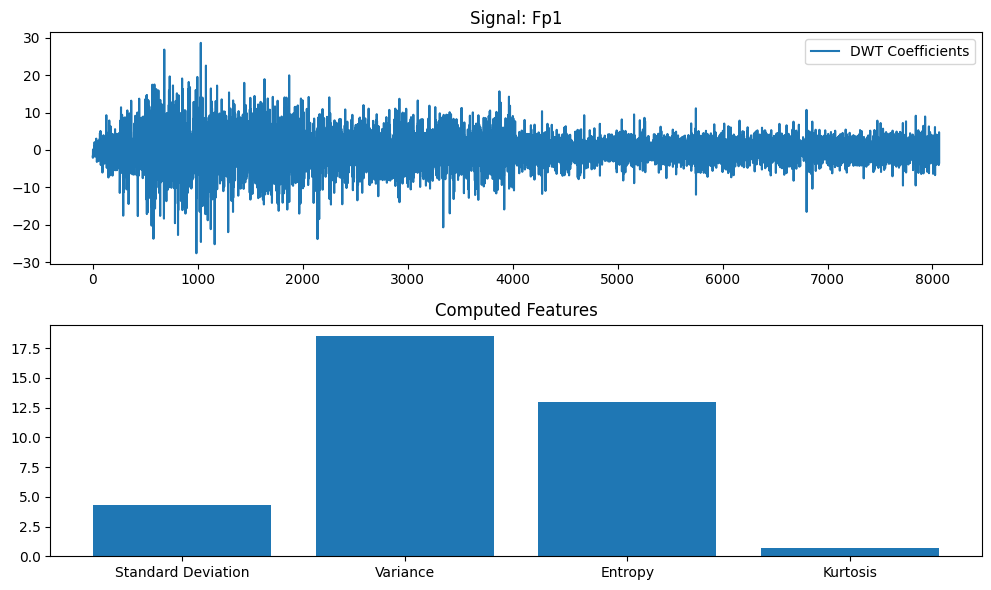

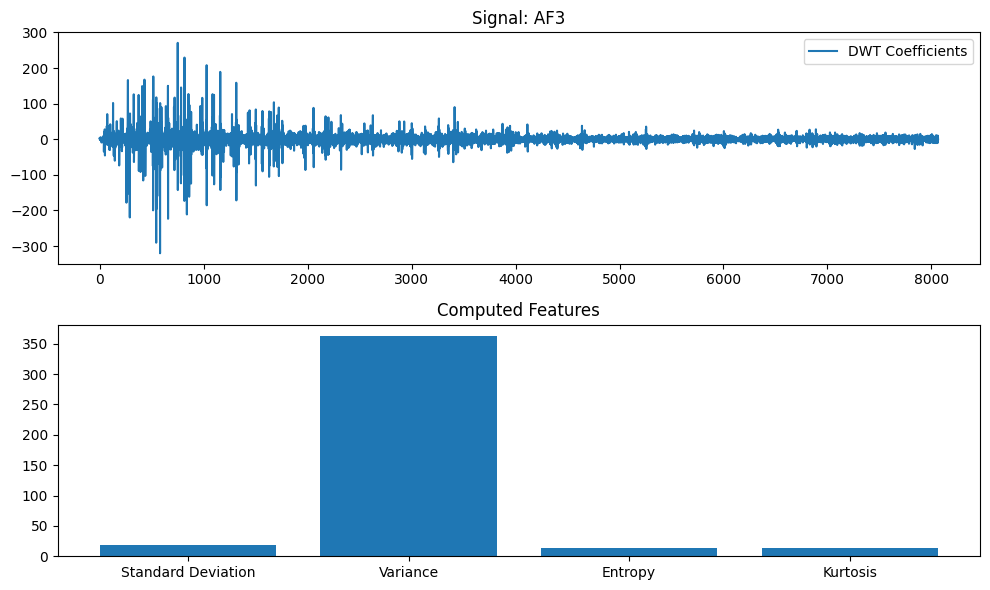

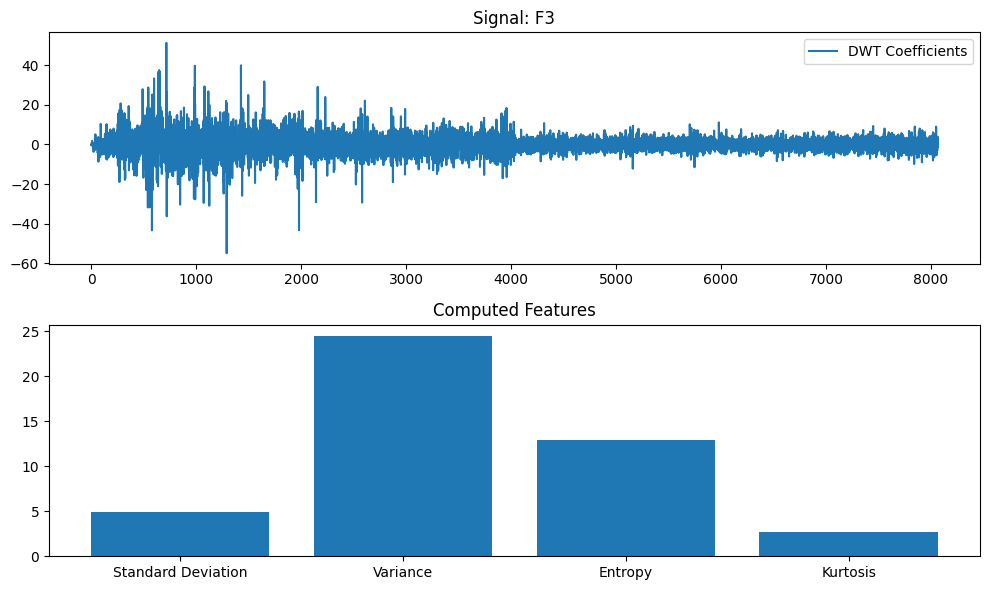

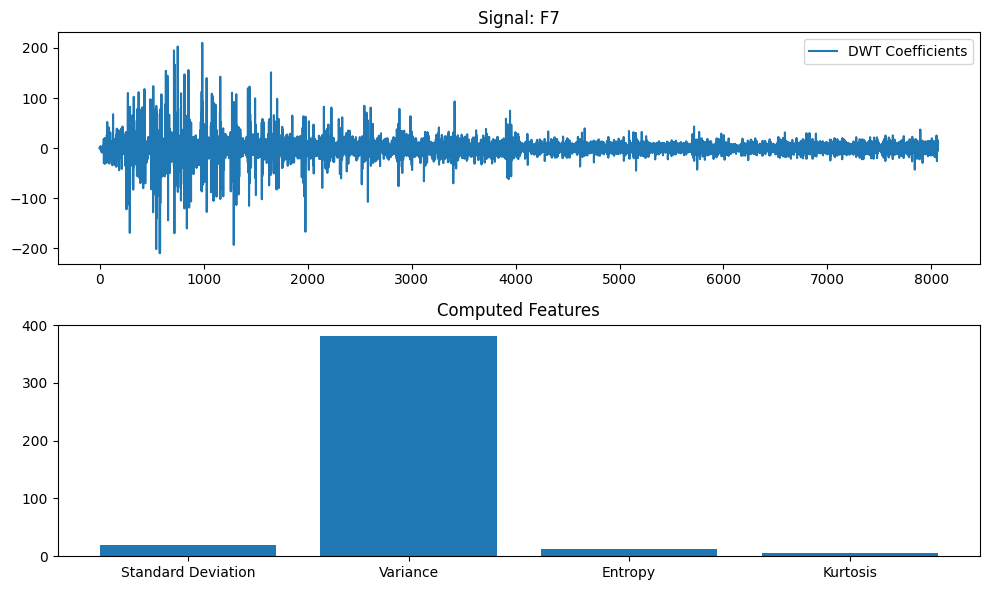

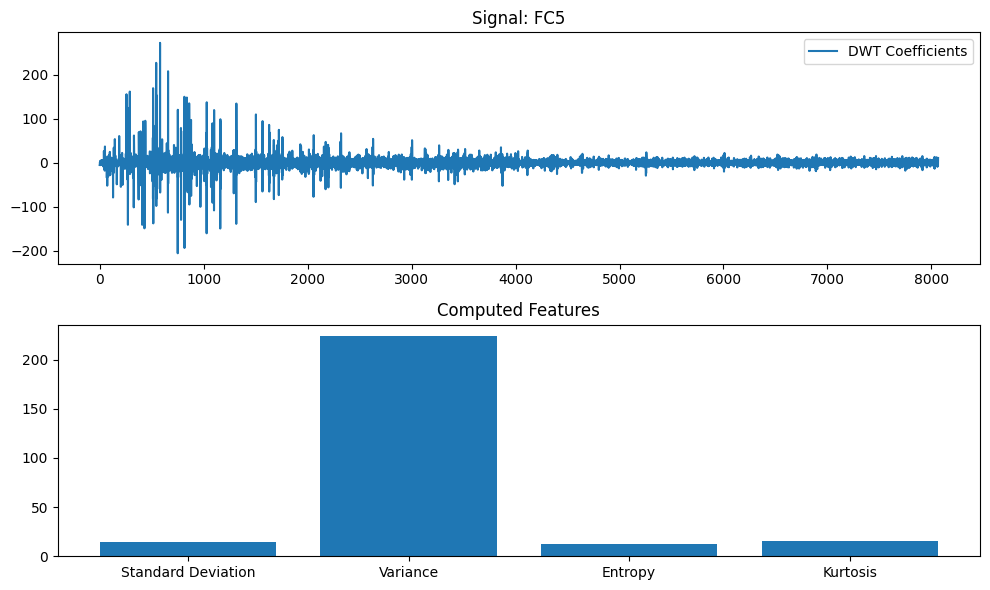

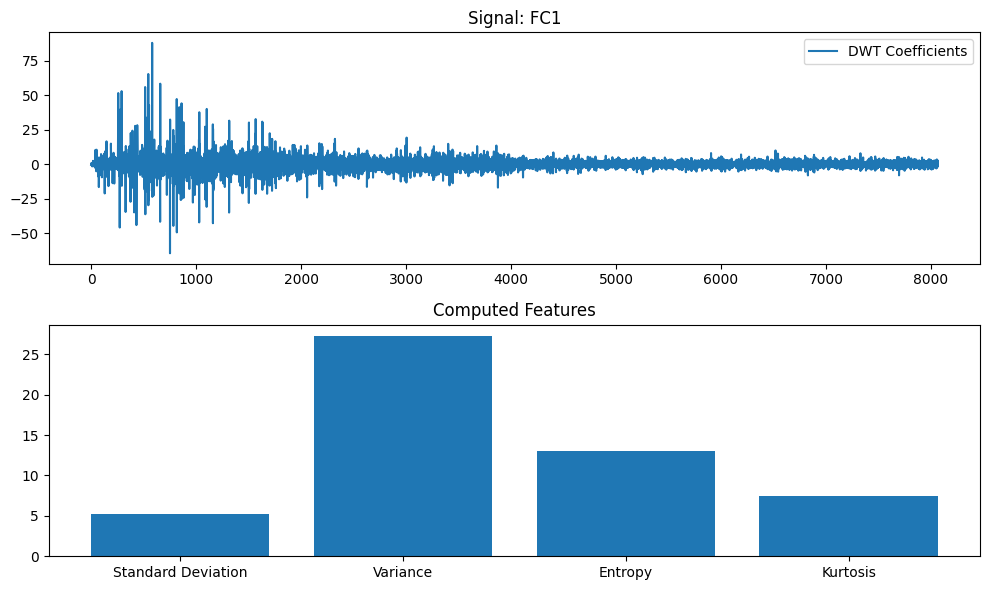

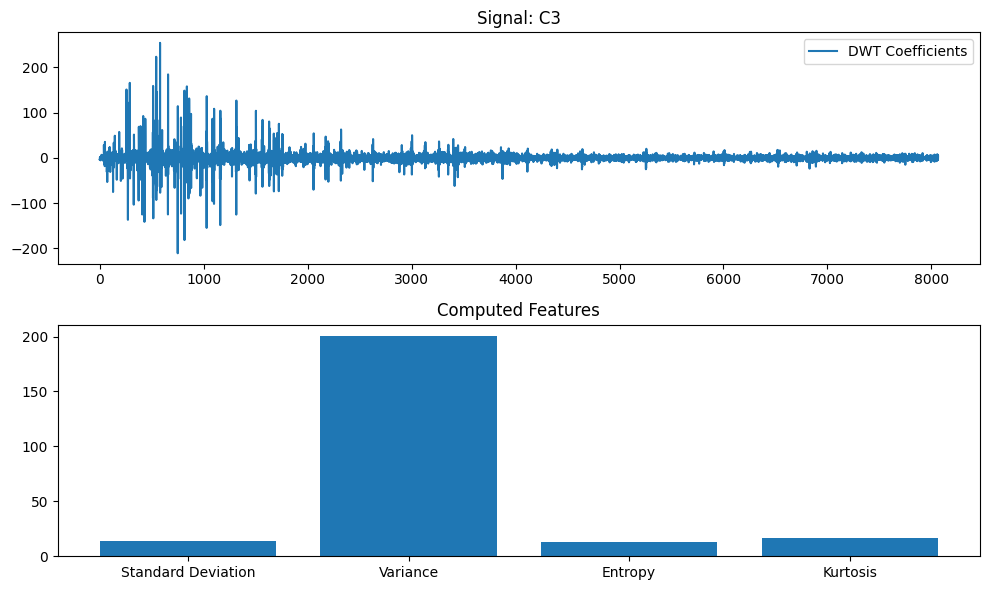

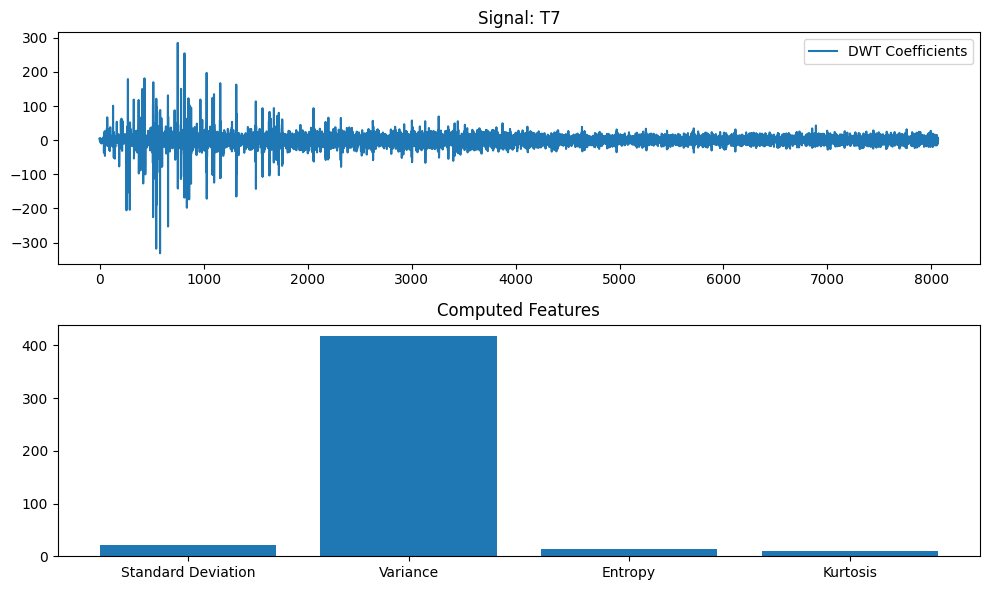

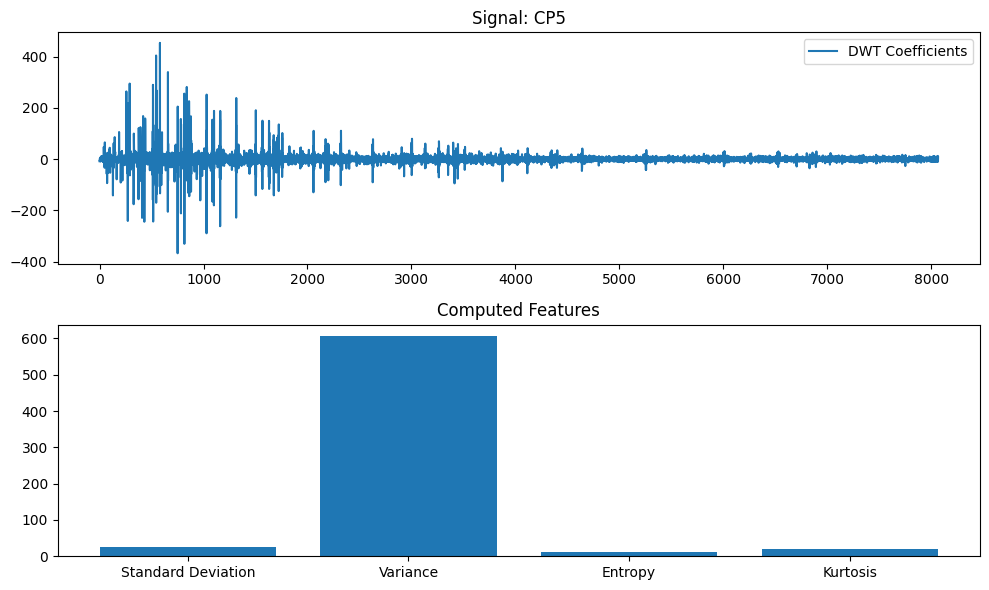

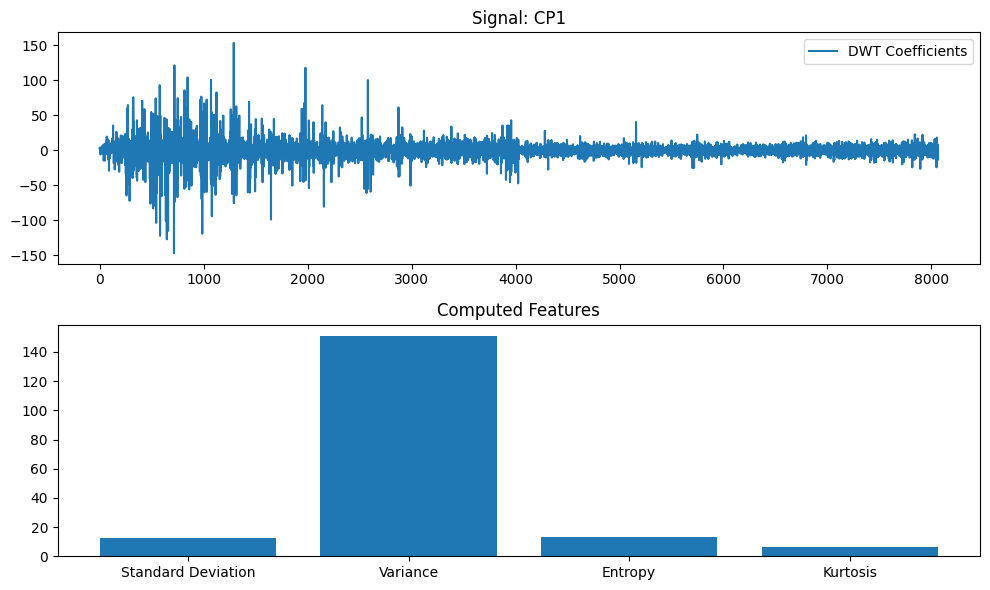

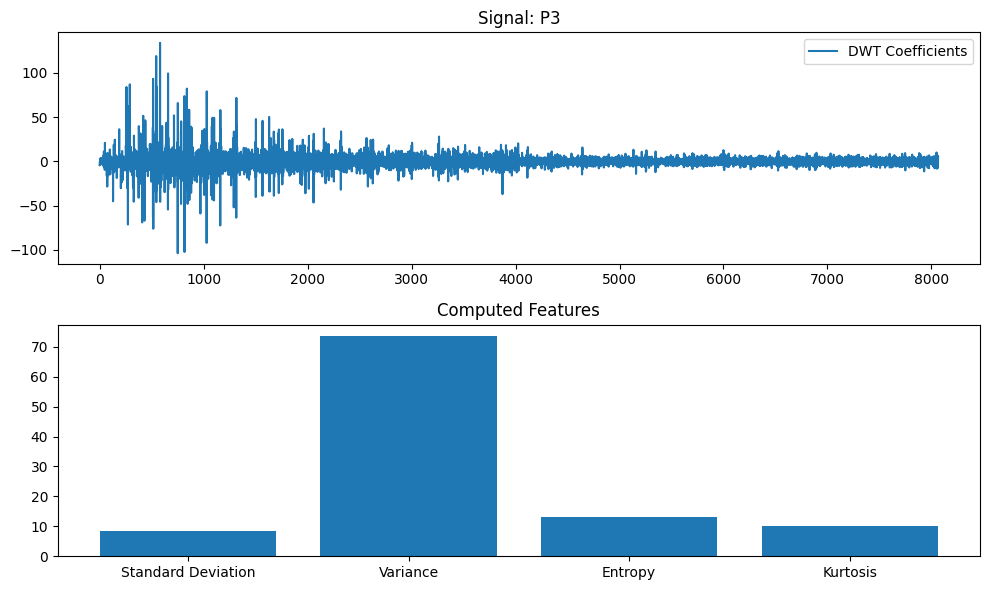

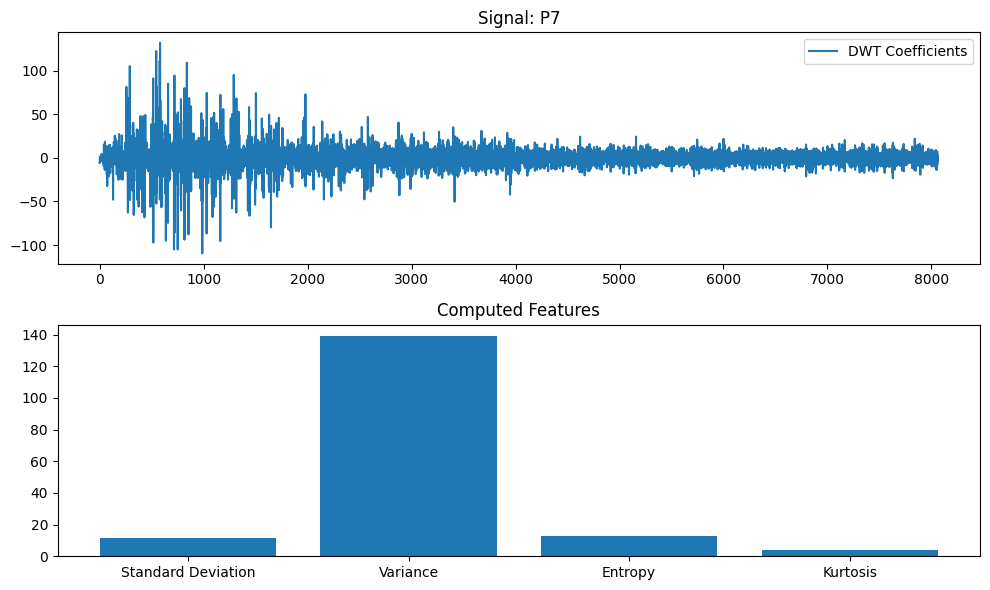

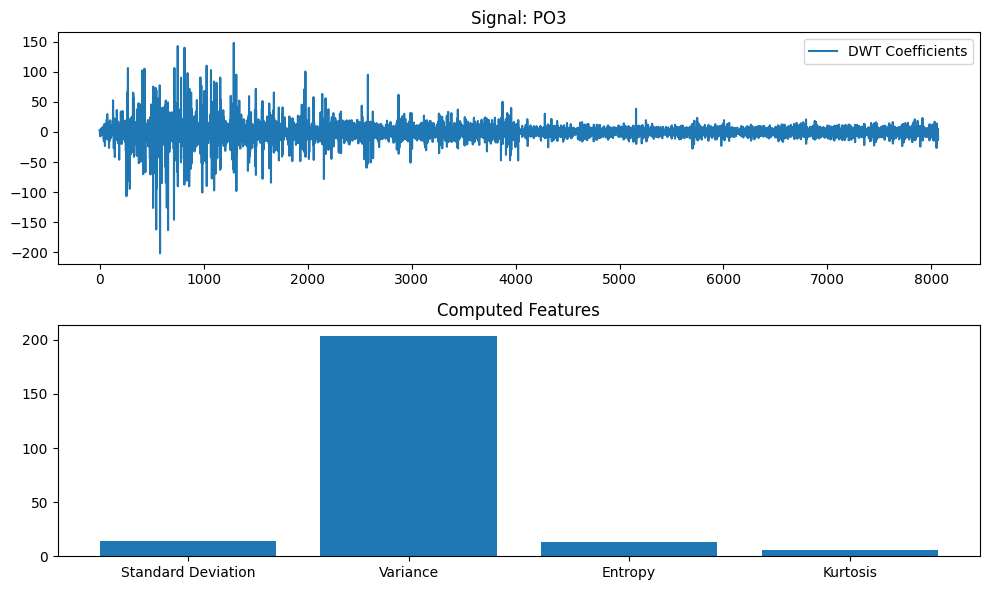

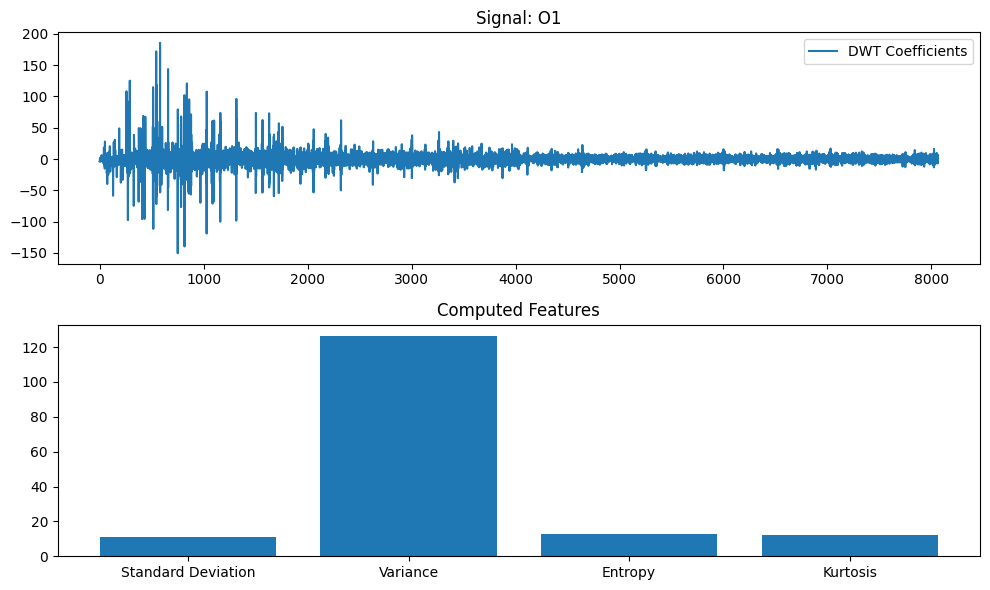

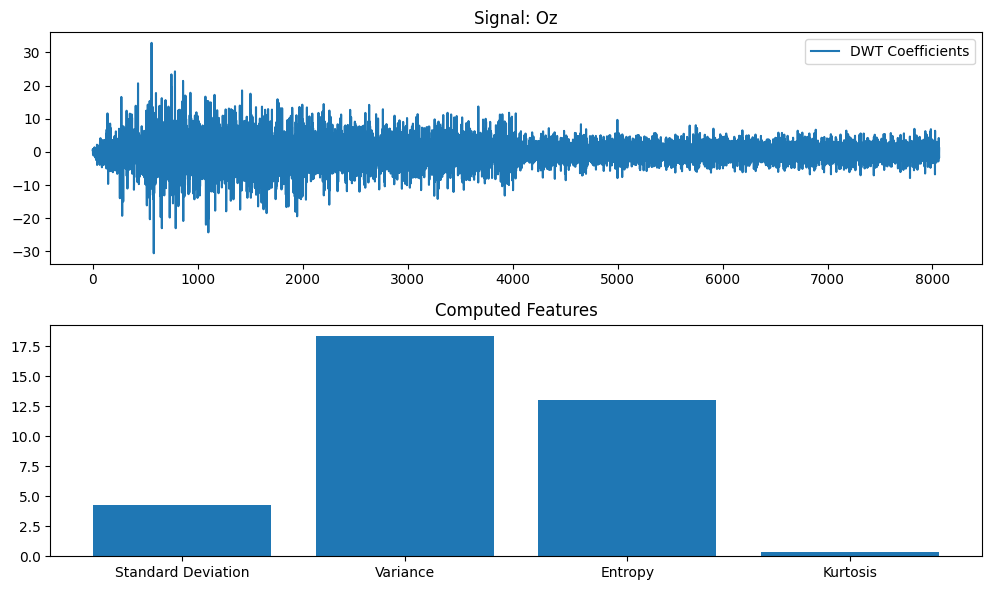

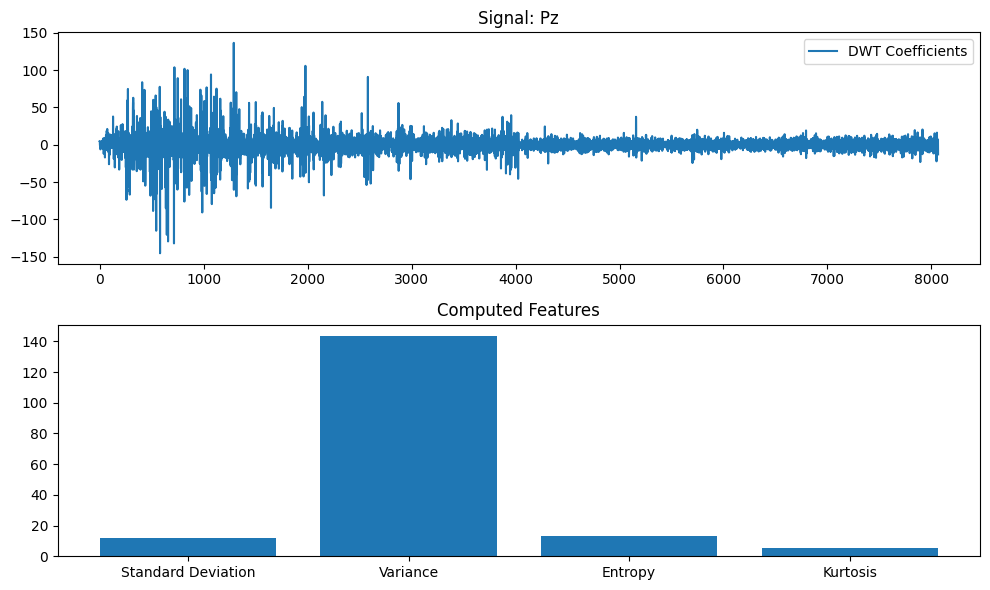

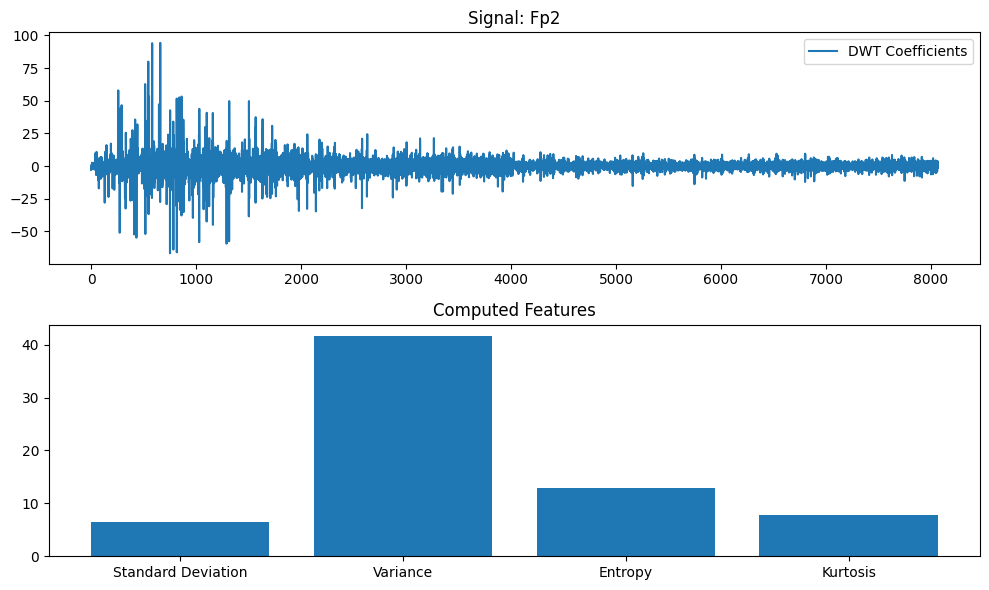

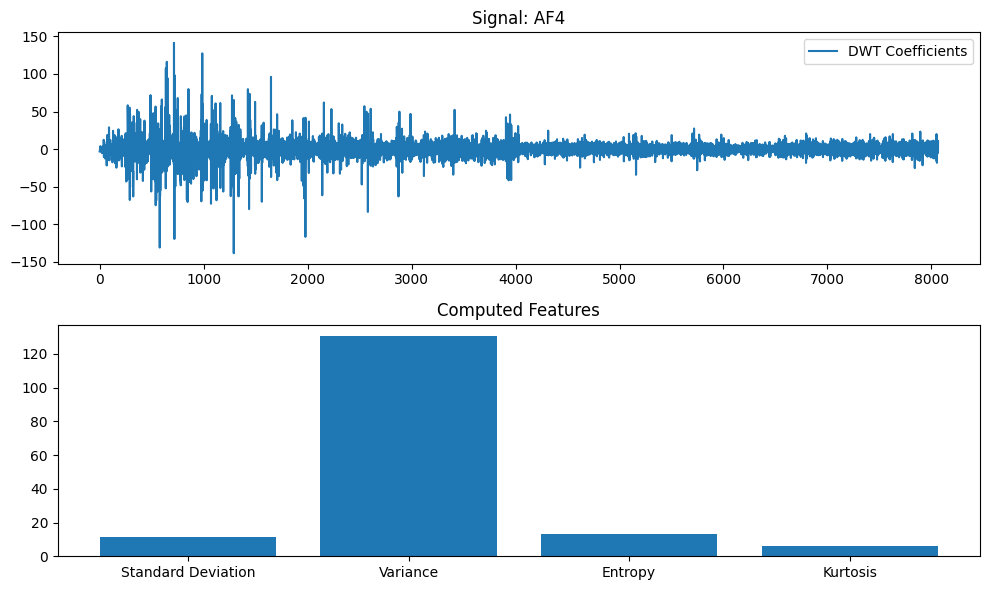

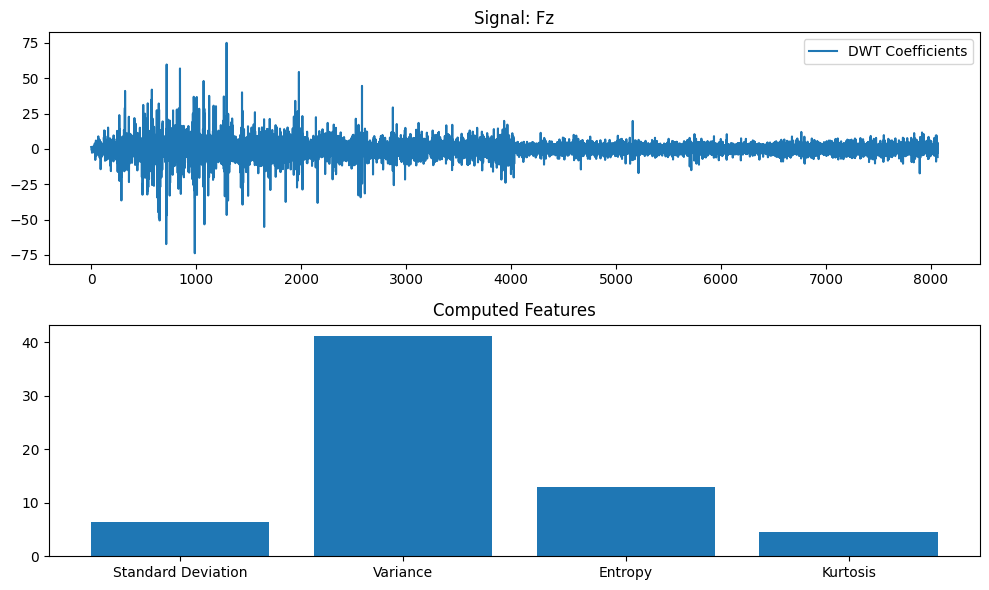

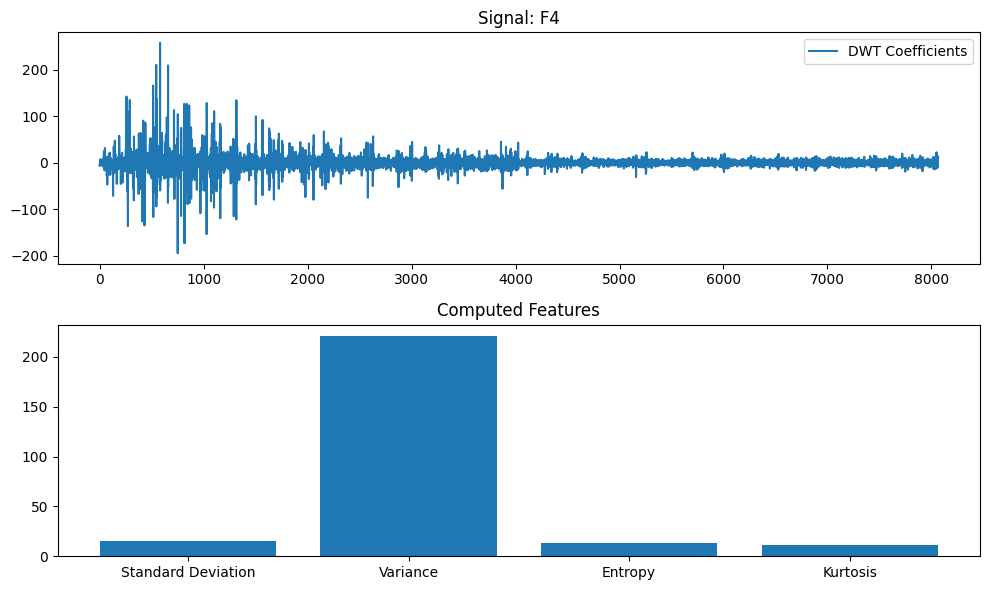

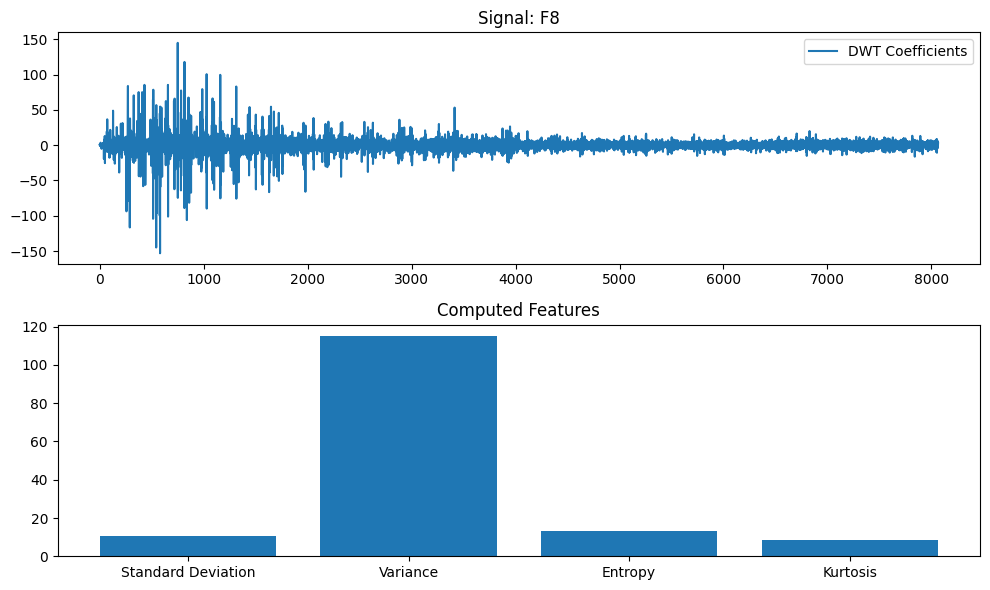

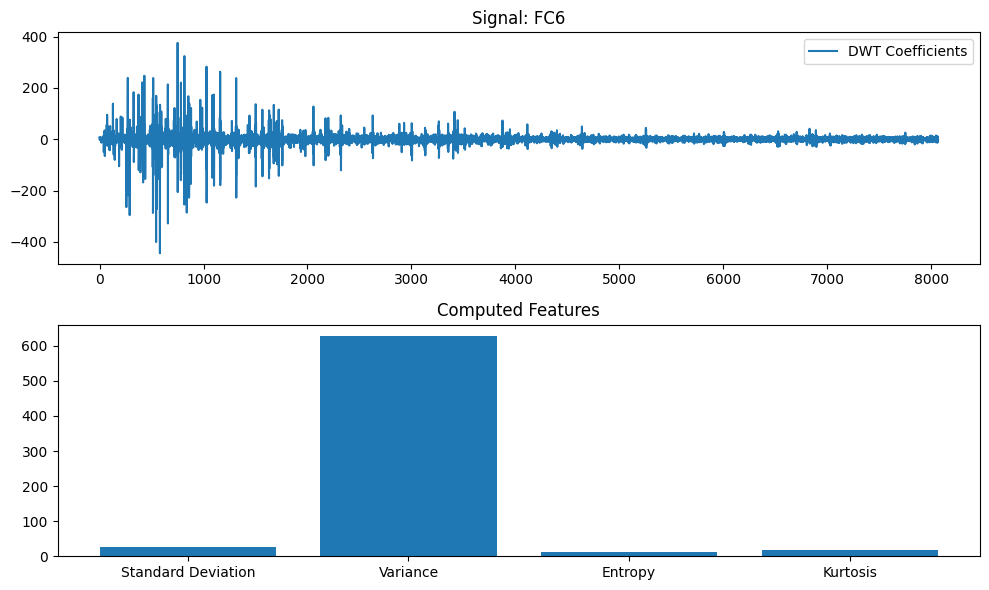

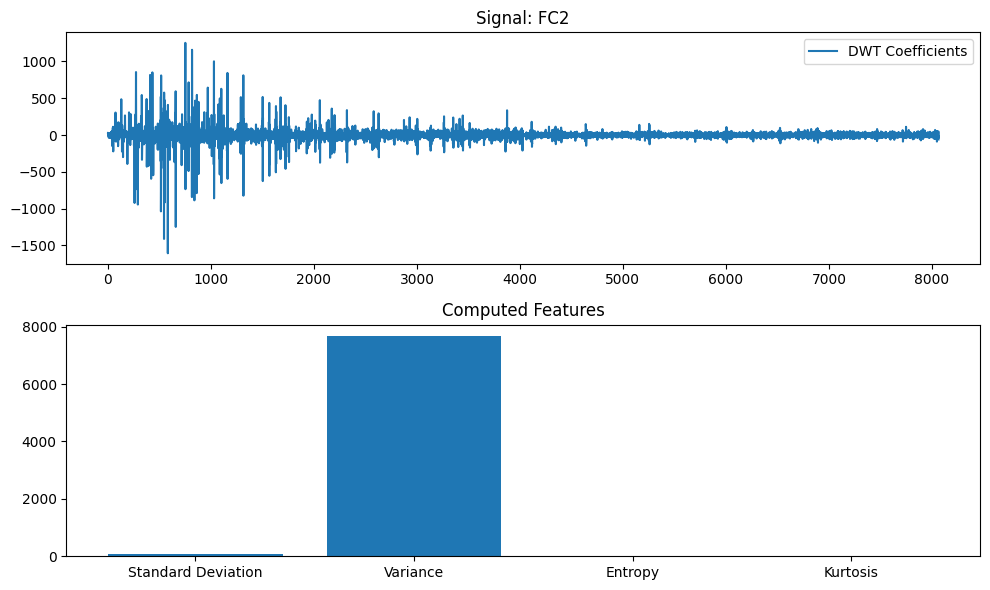

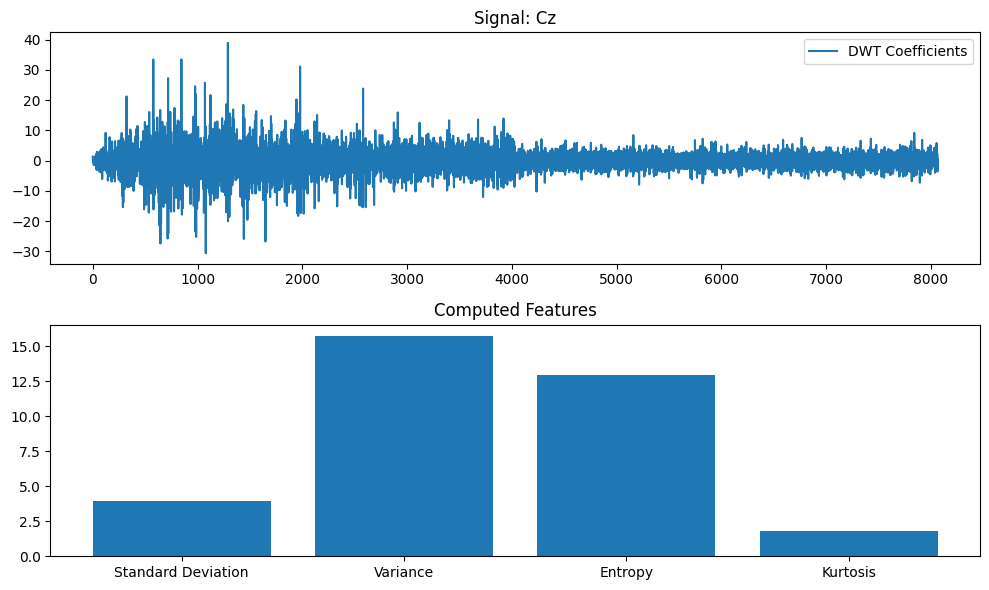

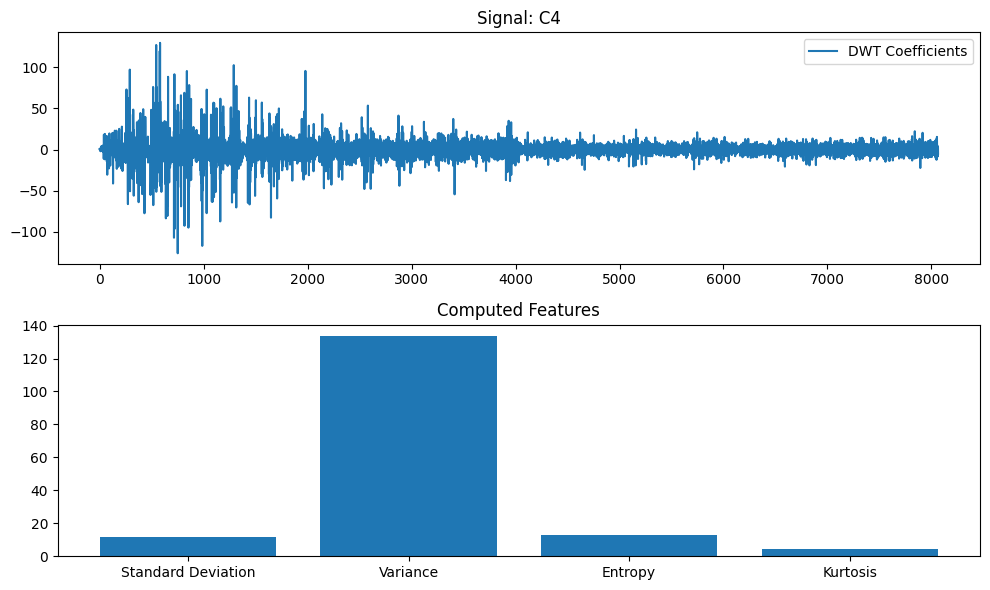

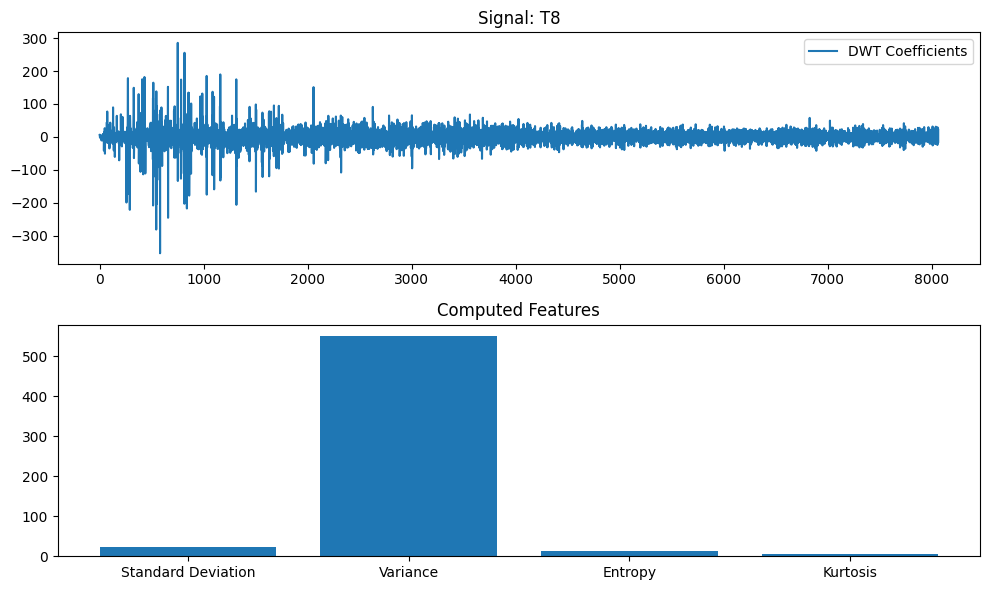

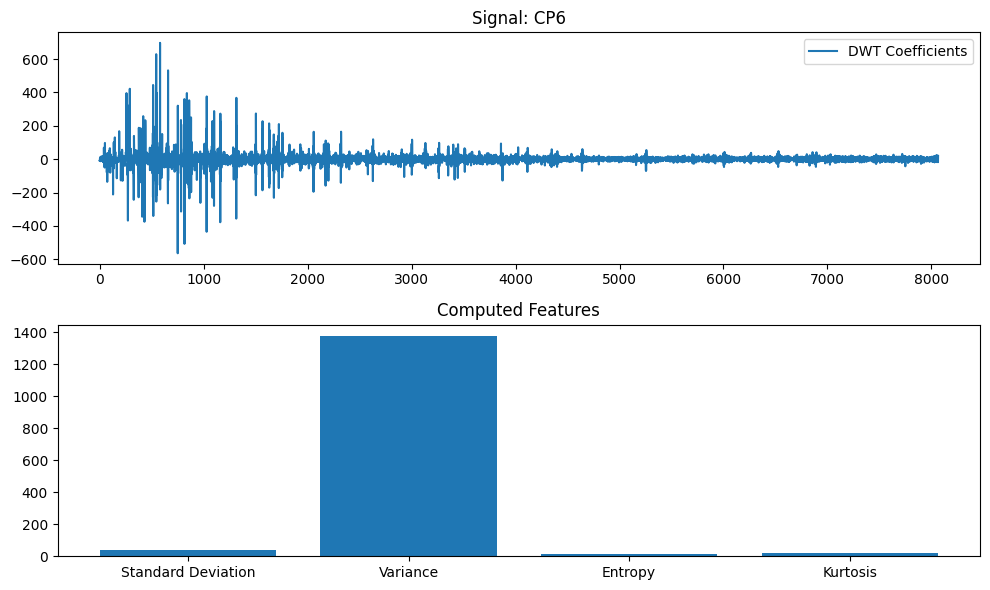

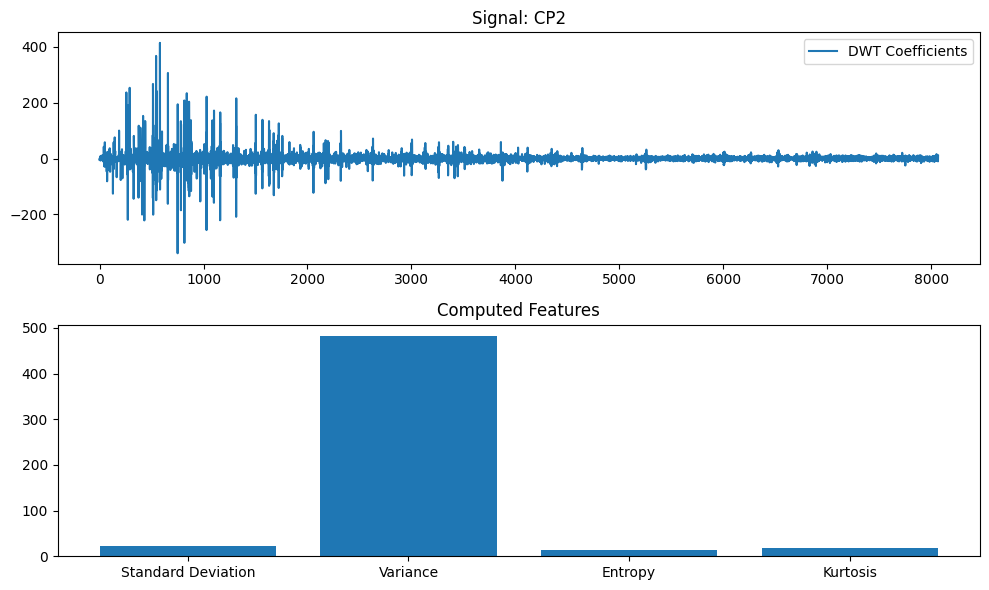

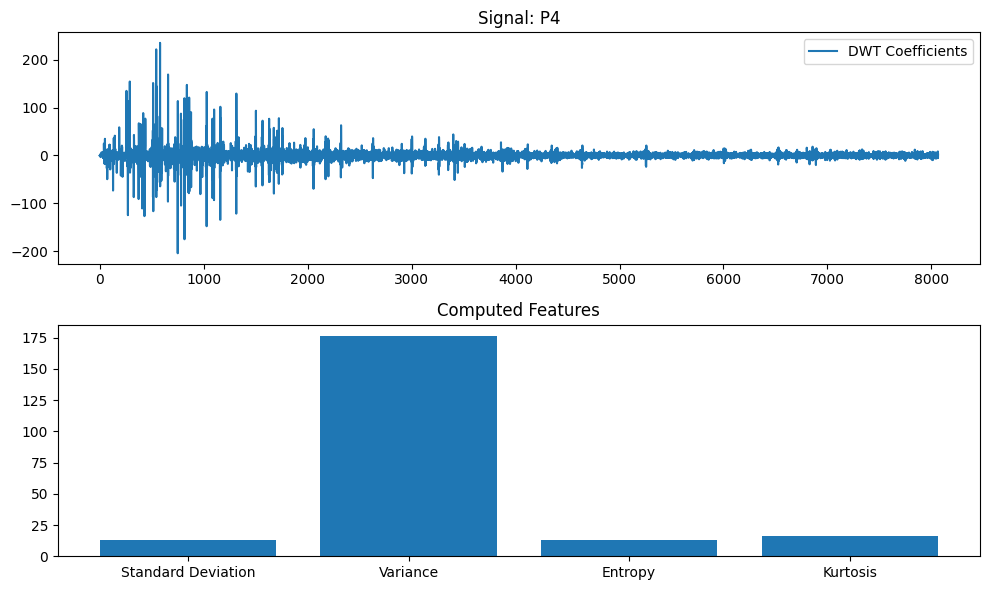

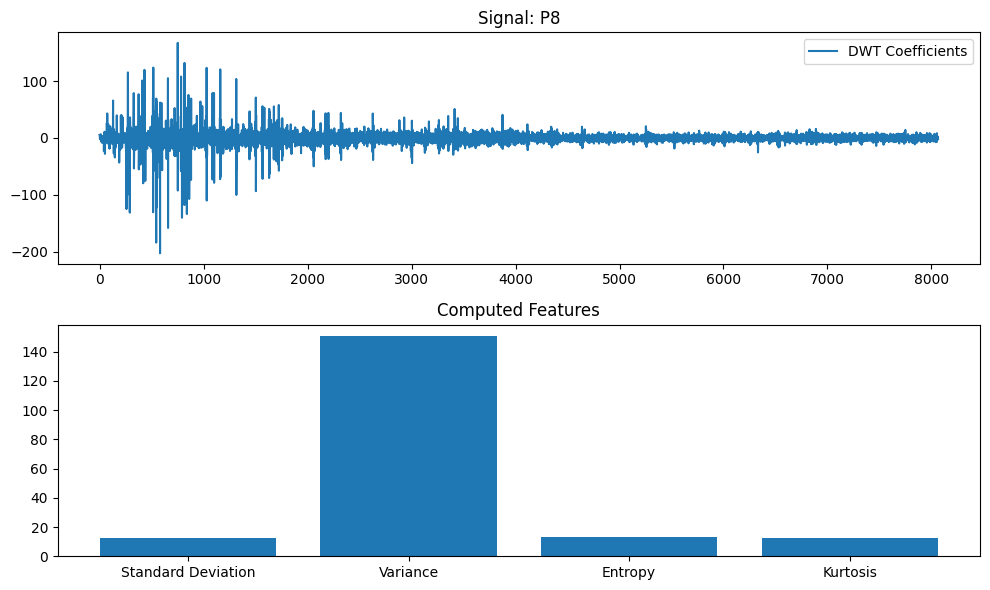

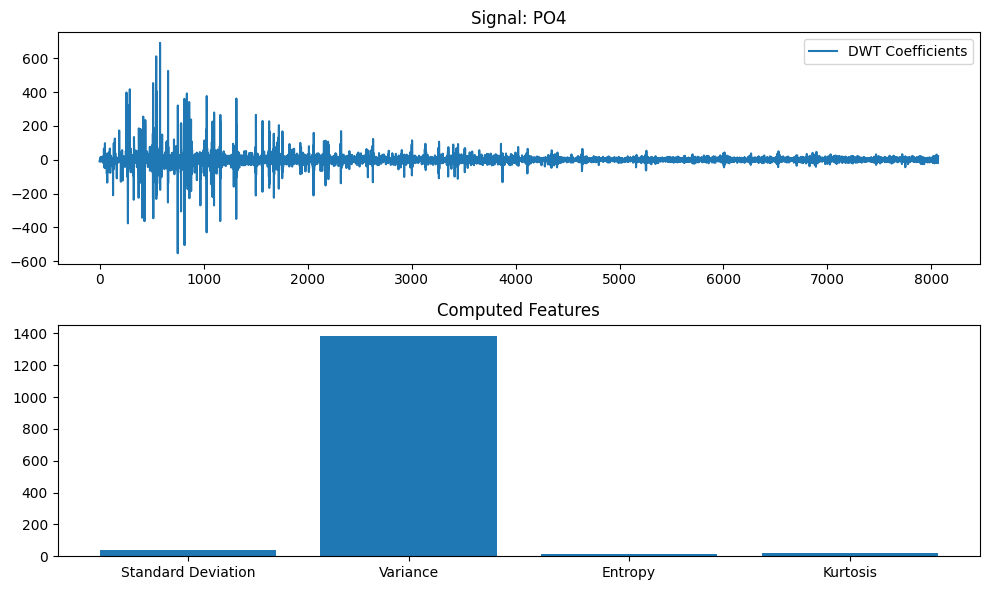

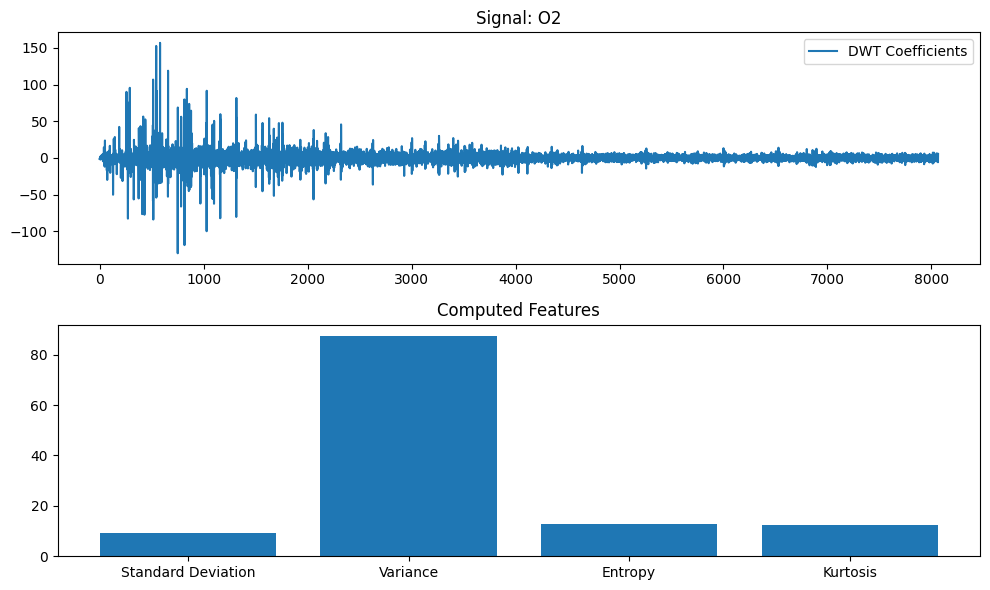

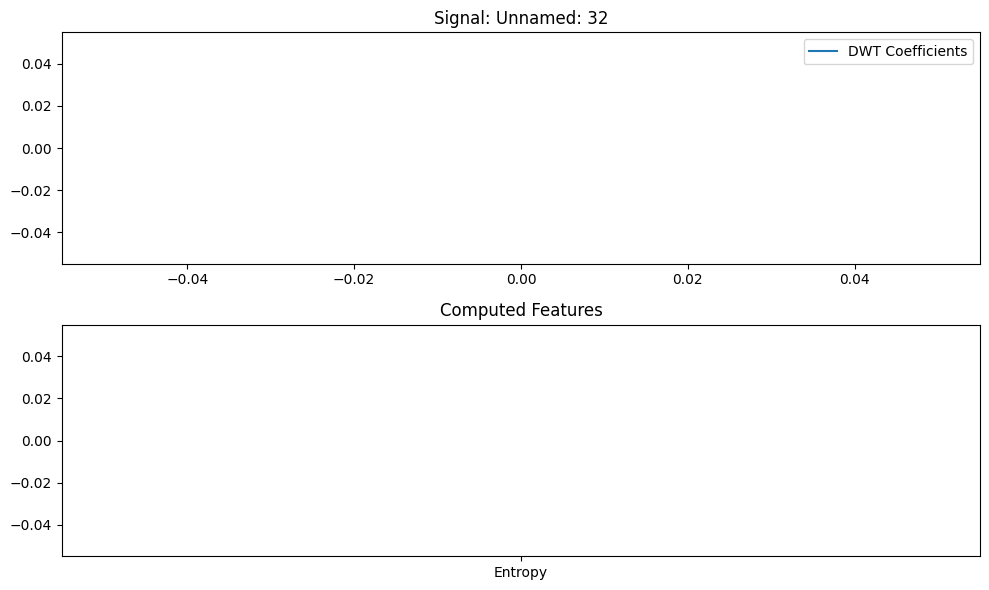

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import pandas as pd
import numpy as np
from scipy.stats import entropy, kurtosis
import pywt
import matplotlib.pyplot as plt

# Function to compute Discrete Wavelet Transform (DWT) coefficients for a signal (column)
def calculate_dwt(signal):
    coeffs = pywt.wavedec(signal, 'db1')  # Using Daubechies wavelet of order 1
    return np.concatenate(coeffs)

# Function to load dataset and compute features
def process_dataset():
    # Load the dataset
    filepath = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if not filepath:
        return
    dataset = pd.read_csv(filepath)

    # Dictionary to store computed features for each column
    features_dict = {}

    # Iterate over each column (signal) in the dataset
    for column in dataset.columns:
        signal_data = dataset[column]
        
        # Calculate Discrete Wavelet Transform (DWT) coefficients for the signal
        dwt_coefficients = calculate_dwt(signal_data)
        
        # Calculate other features
        std_dev = np.std(signal_data)
        variance = np.var(signal_data)
        ent = entropy(signal_data.value_counts(normalize=True), base=2)
        kurt = kurtosis(signal_data)
        
        # Store features in the dictionary
        features_dict[column] = {
            'DWT_coefficients': dwt_coefficients,
            'Standard_Deviation': std_dev,
            'Variance': variance,
            'Entropy': ent,
            'Kurtosis': kurt
        }

    # Display the signals based on the computed features
    display_signals(features_dict)

# Function to display signals based on computed features
def display_signals(features_dict):
    # Plot each signal with its features
    for signal, features in features_dict.items():
        plt.figure(figsize=(10, 6))
        
        # Plot the signal
        plt.subplot(2, 1, 1)
        plt.plot(features['DWT_coefficients'], label='DWT Coefficients')
        plt.title(f"Signal: {signal}")
        plt.legend()
        
        # Plot the features
        plt.subplot(2, 1, 2)
        plt.bar(['Standard Deviation', 'Variance', 'Entropy', 'Kurtosis'],
                [features['Standard_Deviation'], features['Variance'], features['Entropy'], features['Kurtosis']])
        plt.title("Computed Features")
        
        plt.tight_layout()
        plt.show()

# Create the main window
window = tk.Tk()
window.title("Dataset Analysis")

# Button to upload dataset and process features
upload_button = tk.Button(window, text="Upload Dataset", command=process_dataset)
upload_button.pack(pady=10)

# Run the Tkinter event loop
window.mainloop()
